In [48]:
import uproot
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import math
from scipy.fft import fft, fftfreq
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

import os
from plotly.subplots import make_subplots
from plotly import tools
import plotly.offline as pyo
import sys

In [49]:
files =uproot.open(f"/Users/danielcarber/Documents/SBND/Noise Analysis/data/fft_output.root")
files['tpc_noise;2'].keys()

['avg_FFT']

In [50]:
raw_rms = files['tpc_noise;3']['avg_FFT'].array()
print(raw_rms)
raw_rms = files['tpc_noise;2']['avg_FFT'].array()
print(raw_rms)

[0, 125, 132, 139, 128, 124, 131, ..., 16.7, 15.2, 16.6, 16.8, 16.5, 16.5, 15.4]
[0, 125, 132, 139, 128, 124, 131, 135, ..., 179, 189, 173, 187, 198, 192, 210]


In [51]:
print((raw_rms[100]))
print(len((raw_rms)))
df = {'total':[0]*1708}
#print(df['total'])
channel = -1
for i in range(0,1708,1):
    if i%1708 == 0:
        channel +=1
        df[f'{channel}'] = [raw_rms[i]]  
        df['total'][0] +=raw_rms[i]
    else:
        df[f'{channel}'].append(raw_rms[i])
        df['total'][i%1708] +=raw_rms[i]

137.01335
17252760


In [52]:
np.divide(df['total'],500)

array([0.        , 0.24954195, 0.26481967, ..., 0.03099648, 0.03383241,
       0.03551394])

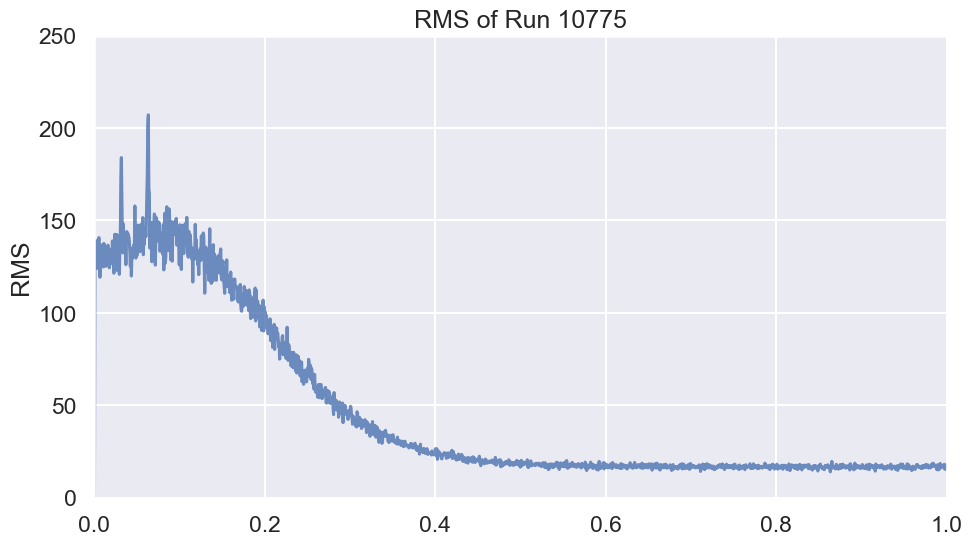

In [53]:
seaborn.set(rc={
    'figure.figsize':(11, 6),
})
seaborn.set_context('talk')
freq = list(range(len(df['0'])))
freq = (np.add(freq,.5))*2/3415
#plt.plot(range(len(ADC_array[0][0])),ADC_array[0][4231])
#plt.hist(signal_diff_coll,range = [0,300],bins = 100, label = "Coll")
#plt.hist(signal_diff_ind_1,range = [0,300],bins = 100,alpha = .6, label = "Ind 1")
#plt.hist(signal_diff_ind_2,range = [0,300],bins = 100, alpha = .2,label = "Ind 2")
#plt.scatter(df['channel_id'],df['raw_rms'],alpha = 1, label = "RMS before shift",s = 10)
#plt.scatter(df_2['channel_id'],df_2['raw_rms'],alpha = 1, label = "RMS after shift",s = 10)
plt.plot(freq,df['0'] ,alpha = .8, label = "RMS of Channels w/ signals")

#plt.hist(df['Time_diff'], range=[0, 2000],bins=50,alpha =1, label = "Time difference")
#plt.hist(selection['reco_dedx'][ep_mask_e], range=[0, 10], alpha = .4,bins=50,label = "Reco Electrons")
plt.ylim(0,250)
plt.xlim(0,1)
#plt.yscale("log")
#plt.legend(loc = "upper right")
plt.xlabel("")
plt.ylabel("RMS")
plt.title("RMS of Run 10775")
plt.show()
#plt.savefig('dedx_4000_events.png')

In [54]:
fig = make_subplots(rows=1,cols =1)
#mask = Noise_df['wire_plane'] == 'UB'
#median = np.median(Noise_df['Raw_rms'][mask])
#mean = np.mean(Noise_df['Raw_rms'][mask])
#fig.add_trace(go.Histogram(x=Noise_df['Raw_rms'][mask],marker_color = 'red',xbins=dict(start = median - 5,end = median+5,size=.05)),row = 1, col =2)
fig.add_trace(go.Scatter(x=freq,y = np.divide(df['total'],1),marker_color = 'red'),row = 1, col = 1)
fig.update_layout(xaxis = dict(range = [1*0,.996*1]),yaxis = dict(range = [0,250]))
fig.show()
#fig.add_annotation(dict(font = dict(size = 10),xshift= 180,yshift=120,text = f"Mean RMS:{mean:.2f}",showarrow = False),row =1,col=2)
#fig.add_annotation(dict(font = dict(size = 10),xshift= 180,yshift=110,text = f"Median RMS:{median:.2f}",showarrow = False),row =1,col=2)

